In [58]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [62]:
data = pd.read_csv('Data.csv')



In [63]:
data.head(20)


,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [64]:
data.isnull().sum()


gender                      0
Nationality                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentSurvey                0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [65]:

one_hot = pd.get_dummies(data['gender'])
one_hot1= pd.get_dummies(data['Nationality'])
one_hot2= pd.get_dummies(data['PlaceofBirth'])
one_hot3= pd.get_dummies(data['StageID'])
one_hot4= pd.get_dummies(data['GradeID'])
one_hot5= pd.get_dummies(data['SectionID'])
one_hot6= pd.get_dummies(data['Topic'])
one_hot7= pd.get_dummies(data['Semester'])
one_hot8= pd.get_dummies(data['Relation'])
one_hot9= pd.get_dummies(data['ParentSurvey'])
one_hot9_1= pd.get_dummies(data['ParentschoolSatisfaction'])
one_hot9_2= pd.get_dummies(data['StudentAbsenceDays'])
one_hot9_3= pd.get_dummies(data['Class'])

In [67]:
print(one_hot4)

     G-02  G-04  G-05  G-06  G-07  G-08  G-09  G-10  G-11  G-12
0       0     1     0     0     0     0     0     0     0     0
1       0     1     0     0     0     0     0     0     0     0
2       0     1     0     0     0     0     0     0     0     0
3       0     1     0     0     0     0     0     0     0     0
4       0     1     0     0     0     0     0     0     0     0
5       0     1     0     0     0     0     0     0     0     0
6       0     0     0     0     1     0     0     0     0     0
7       0     0     0     0     1     0     0     0     0     0
8       0     0     0     0     1     0     0     0     0     0
9       0     0     0     0     1     0     0     0     0     0
10      0     0     0     0     1     0     0     0     0     0
11      0     0     0     0     1     0     0     0     0     0
12      0     1     0     0     0     0     0     0     0     0
13      0     0     0     0     0     1     0     0     0     0
14      0     0     0     0     0     1 

In [68]:
categorical_features = (data.select_dtypes(include=['object']).columns.values)
categorical_features

array(['gender', 'Nationality', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype=object)

In [69]:
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion'], dtype=object)

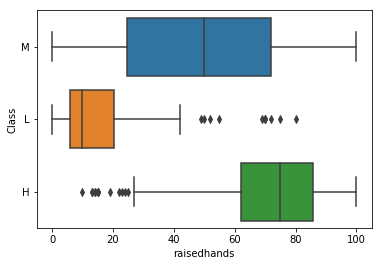

In [70]:
sns.boxplot(x='raisedhands', y='Class', data=data)

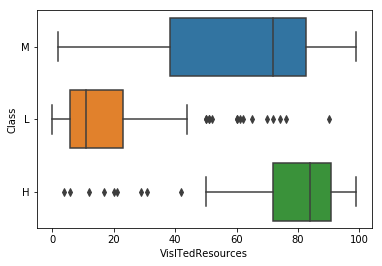

In [71]:
sns.boxplot(x='VisITedResources', y='Class', data=data)

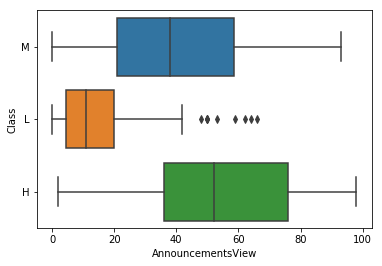

In [72]:
sns.boxplot(x='AnnouncementsView',y='Class',data=data)

In [73]:
df = pd.concat([one_hot,one_hot1,one_hot2,one_hot3,one_hot4,one_hot5,one_hot6,one_hot7,one_hot8,one_hot9,one_hot9_1,one_hot9_2,one_hot9_3], axis=1)

data.shape


(480, 17)

In [74]:
df.head(30)

data1 = pd.concat([data,df],axis=1)






In [75]:
data= data.drop(['gender','Nationality','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class'],axis = 1)


In [76]:
data = pd.concat([data,df],axis=1,ignore_index=True)


In [77]:
data


,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,15,16,2,20,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,20,20,3,25,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,10,7,0,30,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
5,42,30,13,70,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
6,35,12,0,17,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
7,50,10,15,22,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
8,12,21,16,50,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
9,70,80,25,70,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [78]:
X = data.iloc[:, 0:72].values
y = data.iloc[:, -3:].values

In [79]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [91]:
#Creating the classifier
from sklearn.ensemble import RandomForestClassifier
rclassifier = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', random_state = 0)
rclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [87]:
# Predicting the Test set results
y_pred = rclassifier.predict(X_test)

In [88]:

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rclassifier,X= X_train,y= y_train, cv=10)

In [89]:
accuracies

array([0.79487179, 0.82051282, 0.69230769, 0.79487179, 0.86842105,
       0.65789474, 0.78947368, 0.73684211, 0.86842105, 0.65789474])

In [90]:
accuracies.mean()

0.7681511470985154

In [40]:
clf = rclassifier
indices = np.argsort(rclassifier.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(data.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 ,indices[f],data.columns[indices[f]],rclassifier.feature_importances_[indices[f]]))

Feature ranking:
1. feature 1 1 (0.120241)
2. feature 0 0 (0.114701)
3. feature 2 2 (0.092734)
4. feature 3 3 (0.072421)
5. feature 70 70 (0.071421)
6. feature 71 71 (0.071192)
7. feature 65 65 (0.028954)
8. feature 64 64 (0.028200)
9. feature 67 67 (0.025843)
10. feature 66 66 (0.025062)
11. feature 68 68 (0.017300)
12. feature 4 4 (0.017021)
13. feature 5 5 (0.016502)
14. feature 69 69 (0.016177)
15. feature 23 23 (0.012861)
16. feature 24 24 (0.012743)
17. feature 10 10 (0.012519)
18. feature 48 48 (0.012312)
19. feature 47 47 (0.012299)
20. feature 37 37 (0.011148)
21. feature 9 9 (0.010964)
22. feature 36 36 (0.010247)
23. feature 35 35 (0.009840)
24. feature 62 62 (0.009835)
25. feature 57 57 (0.009652)
26. feature 63 63 (0.009453)
27. feature 42 42 (0.008292)
28. feature 41 41 (0.008072)
29. feature 52 52 (0.008048)
30. feature 50 50 (0.007793)
31. feature 54 54 (0.007321)
32. feature 53 53 (0.006418)
33. feature 38 38 (0.005972)
34. feature 60 60 (0.005448)
35. feature 49 49 (0

IndexError: index 72 is out of bounds for axis 0 with size 72

In [57]:
data1 = data1.iloc[479:,]
data1

,0,1,2,3,4,5,6,7,8,9,...,Mum,No,Yes,Bad,Good,Above-7,Under-7,H,L,M
